In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

import pickle
import sys
sys.path.append('../')
sys.path.append('../usecase_rb')
sys.path.append('../src')
import src
import simulation

/var/folders/d5/3r233ss93fv98nxsrp4wy_hc0000gn/T/ipykernel_4421/3378381528.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from paretoset import paretoset
import pickle

In [3]:
import utils 

PARETO SOLUTIONS OF A RANDOM SAMPLE SET

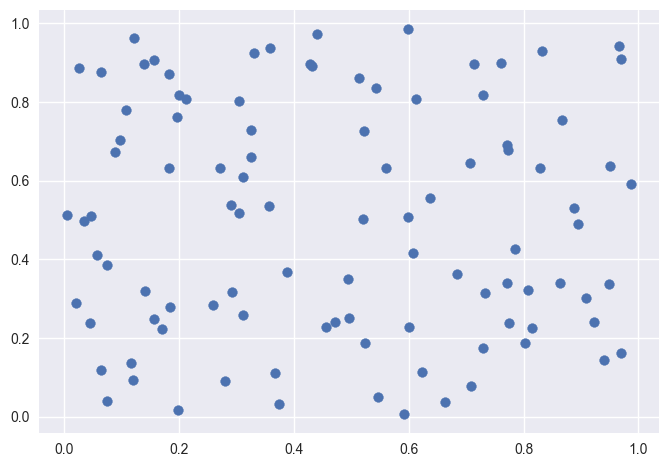

In [4]:
a = 0
b = 1
sample = (b-a) * np.random.random_sample((2,100)) + a
plt.scatter(x=sample[0], y=sample[1])
plt.show()

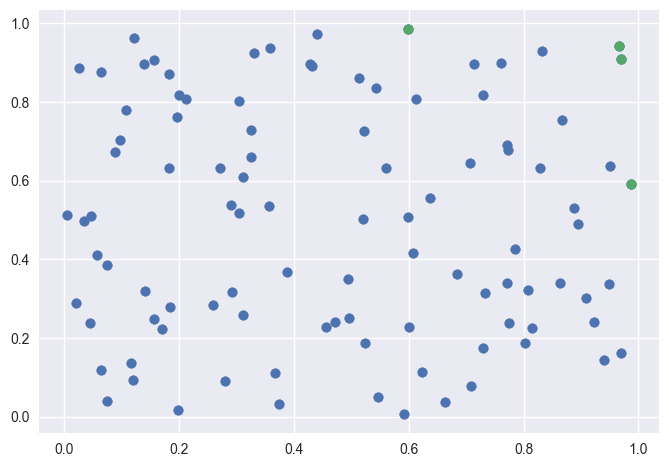

In [5]:
filter = paretoset(sample.T, sense=["max", "max"])

plt.scatter(x=sample[0], y=sample[1])
plt.scatter(x=sample[0][filter], y=sample[1][filter])
plt.show()

LEMMA:

Assuming there is a pareto optimal set of maximization obejctives, then the solution which has the maximum mean over all objectives is always part of the pareto optimal set.


PROOF:

 A set associated with the maximum mean is in the pareto set. Assume that the maximum mean $\overline{x}_{max}$ is not part of the pareto optimal set, then there is to find an increment $\Delta x$, such that $\overline{x}_{\Delta} = \frac{(x_1+\Delta x) + x_2 ... + x_n}{n}$ in the set; this is a contradiction, since it would imply $\overline{x}_{\Delta} > \overline{x}_{max}$.

PARETO SAMPLES IN TRAINING DATA 2x2

/var/folders/d5/3r233ss93fv98nxsrp4wy_hc0000gn/T/ipykernel_4421/912828129.py:8: DeprecationWarning:

nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723



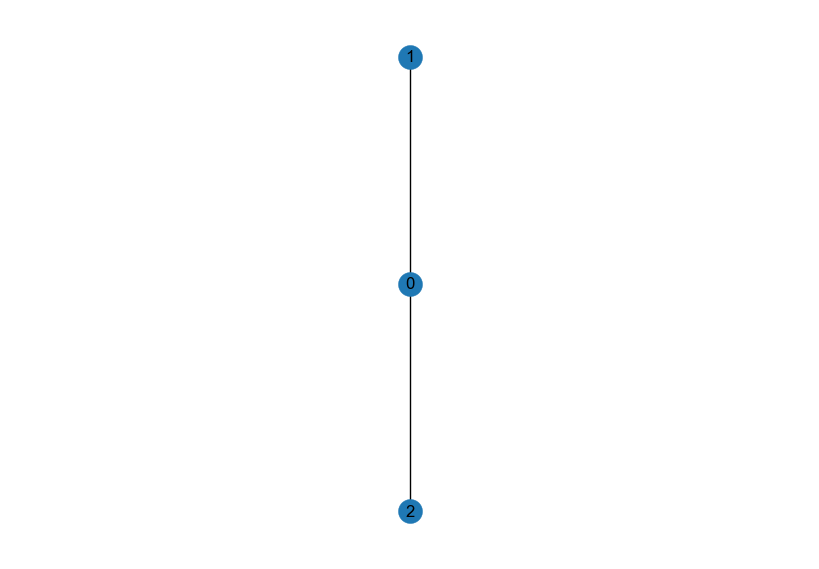

In [213]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.balanced_tree(2, 1)

pos = graphviz_layout(T, prog="twopi")
nx.draw(T, pos, with_labels=True)
plt.show()

In [214]:
with open('../../surdata/SU_tree2,1_0.50h_objective-meanopt_SEED42_03-08-2024_10:01:12.pkl', 'rb') as file: 
    # Load the object from the file
    sur_loaded_data = pickle.load(file)
model = sur_loaded_data

In [215]:
model.vals

{'protocol': 'ndsrs',
 'p_gen': 0.9,
 'p_swap': 1,
 'return_data': 'avg',
 'progress_bar': None,
 'total_time': 1000,
 'N_samples': 1000,
 'p_cons': 0.225,
 'qbits_per_channel': 5,
 'cutoff': 28,
 'M': 2,
 'A': array([[0, 1, 1],
        [1, 0, 0],
        [1, 0, 0]])}

In [216]:
# set cutoff time
T = 2000
M = 4
Fnew = 0.888
Fapp = 0.6
-T*np.log( 3/(4*Fnew-1) * ((4*Fapp-1)/3)**(1/M) )

57.600179652315944

In [217]:
virtual_neighbours = pd.DataFrame(model.y) # N = 1000
virtual_neighbours.columns = [f'node {i}' for i in range(3)]
virtual_neighbours = virtual_neighbours[['node 0', 'node 1', 'node 2']]
virtual_neighbours

,node 0,node 1,node 2
0,0.243243,1.123123,1.120120
1,0.978979,1.464464,1.470470
2,0.162162,1.085085,1.077077
3,0.380380,1.188188,1.190190
4,1.993994,1.302302,1.302302
...,...,...,...
135,1.866867,1.645646,1.644645
136,1.794795,1.587588,1.582583
137,1.861862,1.603604,1.599600
138,1.839840,1.603604,1.607608


In [218]:
virtual_neighbours.sum(axis=1)

0      2.486486
1      3.913914
2      2.324324
3      2.758759
4      4.598599
         ...   
135    5.157157
136    4.964965
137    5.065065
138    5.051051
139    5.107107
Length: 140, dtype: float64

In [219]:
vn = virtual_neighbours.to_numpy()

In [220]:
filter = paretoset(vn, sense=["max"]*3)

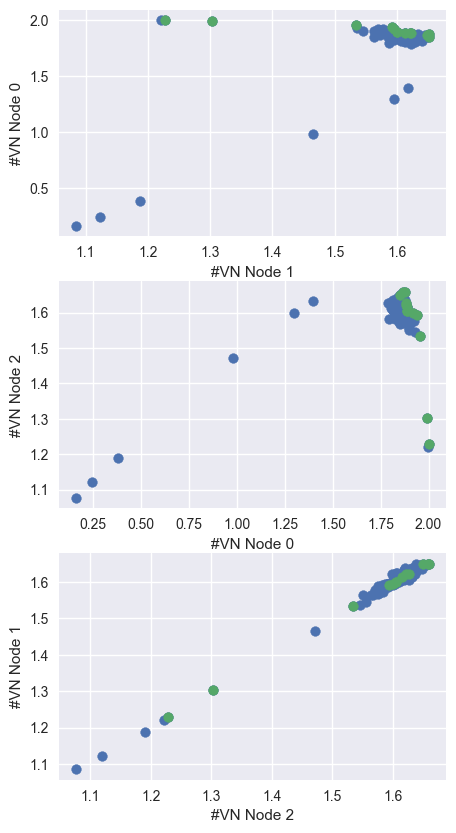

In [221]:
fig, axs = plt.subplots(3,sharey=False, sharex=False, figsize=[5,10])
labels = [1,0,2,1]
for i,ax in enumerate(axs):
    ax.scatter(x=vn[:,labels[i]], y=vn[:,labels[i+1]])
    ax.scatter(x=vn[:,labels[i]][filter], y=vn[:,labels[i+1]][filter])
    ax.set_xlabel(f'#VN Node {labels[i]}')
    ax.set_ylabel(f'#VN Node {labels[i+1]}')

plt.show()

In [222]:
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
virtual_neighbours['filter'] = filter
fig = px.scatter_3d(virtual_neighbours, x=virtual_neighbours.columns[0], y=virtual_neighbours.columns[1], z=virtual_neighbours.columns[2],
              color='filter')
plt.tight_layout()
fig.show()

/opt/homebrew/Caskroom/miniforge/base/envs/qnetsur/lib/python3.9/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Figure size 800x550 with 0 Axes>

<Axes: >

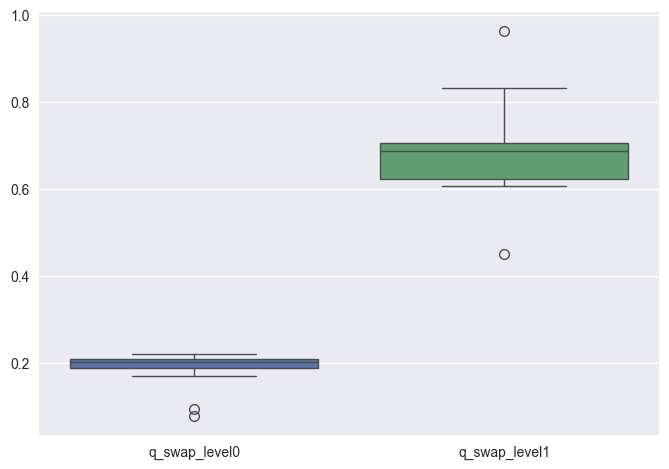

In [223]:
sns.boxplot(model.X_df[filter].drop(['Iteration'], axis=1))

<div style="max-width:400px;margin-left: auto; margin-right: 0